In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_excel(io = '/home/gautham/Downloads/nyc_benchmarking_disclosure_2017_consumption_data.xlsx', sheet_name = 'Information and Metrics')

In [37]:
data.head()

,Order,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Borough,Self-Reported Gross Floor Area (ft²),...,Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Generation Date
0,1,4593574,The Argonaut Building,1.010288e+09,1010287502,1024898,224 West 57th St,10019,Manhattan,169416.0,...,16672.2,6551394.1,1920103.6,1920103.6,732.4,76.3,656.1,3635.5,21.46,2018-02-14
1,3,2967701,Cathedral Preparatory Seminary,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,11373,Queens,94380.0,...,23243.7,616343.7,180640.0,184131.9,164.5,109.9,54.6,102.9,1.09,2018-02-14
2,4,4898531,The Nomad Hotel,1.008290e+09,1-00829-0050,1080710,1170 Broadway,10001-7507,Manhattan,125000.0,...,86776.9,8033914.4,2354605.3,2354605.3,1150.2,438.0,712.3,10762.6,86.10,2018-02-14
3,5,2917939,10 West 27 Street Corp,1.008280e+09,1-00828-0053,1015657,1155 Broadway,10001,Manhattan,50000.0,...,20520.9,1976691.9,579335.2,582516.1,273.4,98.2,175.3,790.1,15.80,2018-02-14
4,6,3878205,Westbury Realty,1.000650e+09,1-00065-0024,1001105,24 John Street,10038,Manhattan,50000.0,...,NaN,1022951.6,299809.9,299809.9,90.7,0.0,90.7,143.0,2.86,2018-02-14


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
Order                                                         34355 non-null int64
Property Id                                                   34355 non-null int64
Property Name                                                 34355 non-null object
Parent Property Id                                            1723 non-null object
Parent Property Name                                          1723 non-null object
BBL - 10 digits                                               33625 non-null float64
NYC Borough, Block and Lot (BBL) self-reported                33626 non-null object
NYC Building Identification Number (BIN)                      33123 non-null object
Address 1 (self-reported)                                     34355 non-null object
Address 2 (self-reported)                                     427 non-null object
Postal Code                                             

In [5]:
for col in data.columns:
    if 'ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col:
        print(data[col].unique())
        print(data[col].nunique())

['Not found']
1
[169416  94380 125000 ...  38117  51960  32350]
16666
[164754.  94380. 125000. ...  38117.  51960.  32350.]
16699
[ 4662.    nan 28006. ...  3059.  5377. 11661.]
2787
[  nan 9134. 4455. ... 1782. 2879. 1989.]
1149
[ 90. 100.  83.  27.  99.  nan  37.  97.  94.  72.  76.  64.  89.  95.
  59.  52.  70.  30.  88.  91.   4.  39.  32.   1.  26.  96.  82.   3.
  86.  98.  87.   7.  65.  45.  80.  93.  79.  81.  75.  46.  67.  73.
   8.  19.  50.  16.  18.  49.  53.  23.   6.  58.  12.  47.   2.  55.
  41.  66.  74.  36.  63.  10.  85.   5.  69.  22.  77.  33.  61.  57.
  14.  42.  20.  38.  60.  35.  92.  43.  68.  84.  71.  24.  78.   9.
  44.  48.  21.  15.  40.  28.  56.  54.  62.  29.  17.  13.  51.  34.
  11.  31.  25.]
100
[138.4  43.5 271.1 ... 298.6 411.4 266.9]
3982
[141.   46.8 274.7 ... 308.2 306.  235.9]
3917
[ 53.8  28.4 130.2 ... 206.5 152.4 242.9]
2604
[ 56.2  31.3 133.7 ... 153.4 254.7 206.3]
2602
[1.130000e+01 2.000000e+00 1.880000e+01 1.170000e+01 6.000000e+0

In [6]:
data = data.replace({'Not found': np.nan})

In [7]:
for col in data.columns:
    if 'ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col:
            data[col] = data[col].astype(float)

In [8]:
def missing_values_table(data):
    mis_values = data.isnull().sum()
    
    mis_values_percent = (mis_values / len(data)) * 100
    
    mis_val_table = pd.concat([mis_values, mis_values_percent], axis = 1)
    
    mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : 'Missing Values Percentage'})
    
#     mis_val_table = mis_val_table[mis_val_table.iloc[:,1].sort_values('Missing Values Percentage', ascending = False)].round(1)
    
    mis_val_table = mis_val_table.sort_values('Missing Values Percentage', ascending = False).round(1)
    
    return mis_val_table

In [9]:
missing_values = missing_values_table(data)

In [10]:
considerable_missing_values = missing_values[missing_values['Missing Values Percentage'] > 50].index

In [11]:
data = data.drop(columns = considerable_missing_values)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 36 columns):
Order                                                         34355 non-null int64
Property Id                                                   34355 non-null int64
Property Name                                                 34355 non-null object
BBL - 10 digits                                               33625 non-null float64
NYC Borough, Block and Lot (BBL) self-reported                33626 non-null object
NYC Building Identification Number (BIN)                      33123 non-null object
Address 1 (self-reported)                                     34355 non-null object
Postal Code                                                   34355 non-null object
Borough                                                       34355 non-null object
Self-Reported Gross Floor Area (ft²)                          34355 non-null float64
Primary Property Type - Self Selected              

Text(0.5, 1.0, 'Energy Star Score Distribution')

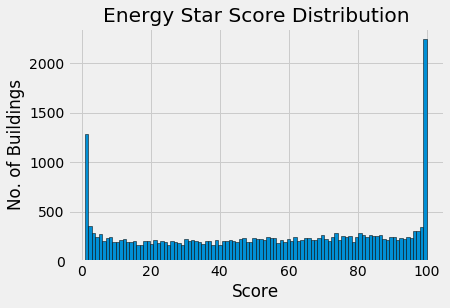

In [15]:
plt.style.use('fivethirtyeight')
plt.hist(data['ENERGY STAR Score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('No. of Buildings')
plt.title('Energy Star Score Distribution')

Text(0.5, 1.0, 'Site EUI Distribution')

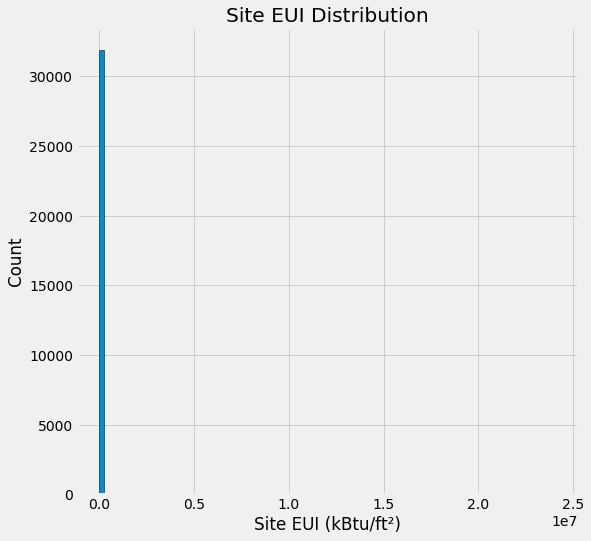

In [20]:
plt.figure(figsize = (8, 8))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Site EUI (kBtu/ft²)')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [25]:
data['Site EUI (kBtu/ft²)'].describe().round(2)

count       31888.00
mean          992.26
std        134994.82
min             0.00
25%            58.00
50%            79.90
75%           103.40
max      24058060.00
Name: Site EUI (kBtu/ft²), dtype: float64

In [34]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

6613       143221.0
6606       143221.0
25533      206060.4
5295       252180.7
5289       252180.7
9244       252180.7
4584       252180.7
17884      328065.6
17883     1340295.0
20192    24058060.0
Name: Site EUI (kBtu/ft²), dtype: float64

*In the above result, the first column is the Index of each row which is "order" and the second column is what that is showing the required column value*

In [43]:
data.loc[data['Site EUI (kBtu/ft²)'] == 24058060.0]

,Order,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Borough,Self-Reported Gross Floor Area (ft²),...,Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Generation Date
20192,20406,5820492,65 broadway llc,1.000210e+09,1-00021-0004,1000809,65 broadway,10006,Manhattan,335184.0,...,NaN,23157732.2,6787142.2,6830963.1,535429700.0,0.0,535429700.0,NaN,NaN,2018-12-09


### Removing Outliers

In [44]:
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']

In [46]:
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

In [47]:
third_quartile

103.4

Interquartile Range

In [48]:
iqr = third_quartile - first_quartile

In [50]:
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) & (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

Text(0.5, 1.0, 'Site EUI Distribution')

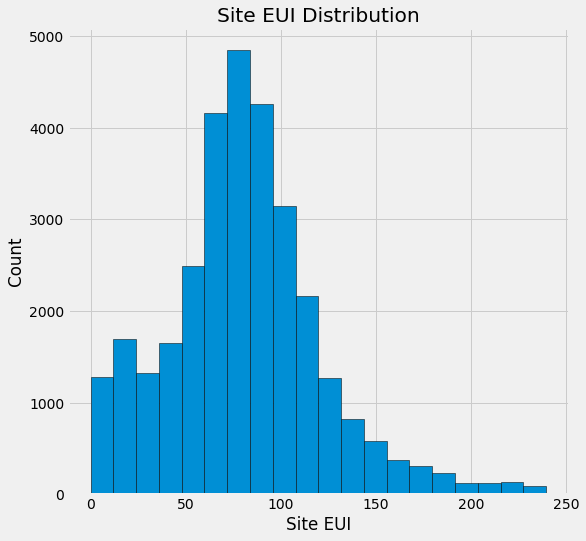

In [52]:
plt.figure(figsize = (8,8))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'k')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [53]:
types = data.dropna(subset = ['ENERGY STAR Score'])

In [55]:
types = types['Largest Property Use Type'].value_counts()

In [56]:
types = types[types.values > 100].index

In [57]:
types

Index(['Multifamily Housing', 'Office', 'K-12 School', 'Hotel',
       'Residence Hall/Dormitory', 'Non-Refrigerated Warehouse',
       'Retail Store', 'Senior Care Community', 'Distribution Center',
       'Worship Facility'],
      dtype='object')

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Building Type')

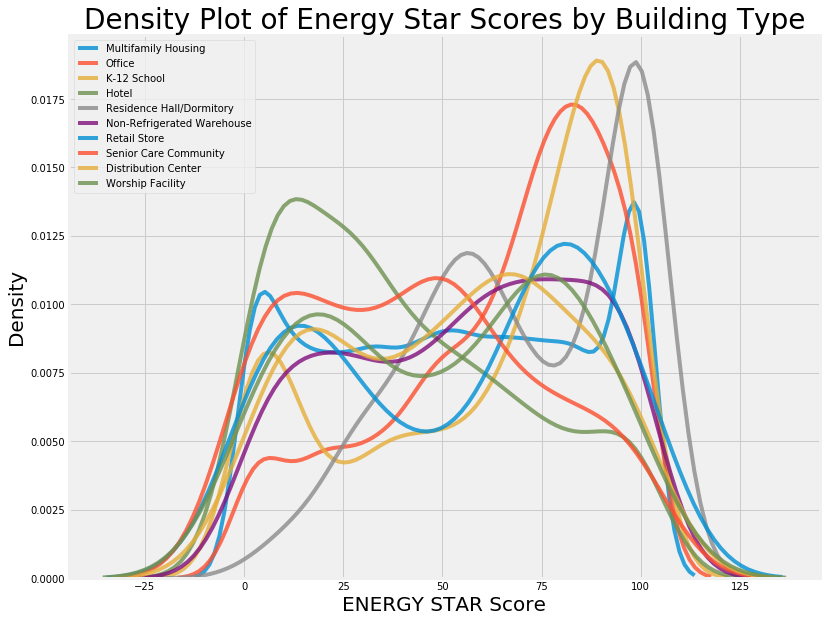

In [59]:
plt.figure(figsize = (12,10))

for b_type in types:
    subset = data[data['Largest Property Use Type'] == b_type]
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = b_type, shade = False, alpha = 0.8)

plt.xlabel('ENERGY STAR Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28)

In [81]:
borough = data.dropna(subset = ['ENERGY STAR Score'])

In [82]:
borough = borough['Borough'].value_counts()

In [83]:
borough = borough[borough.values > 100].index

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Borough')

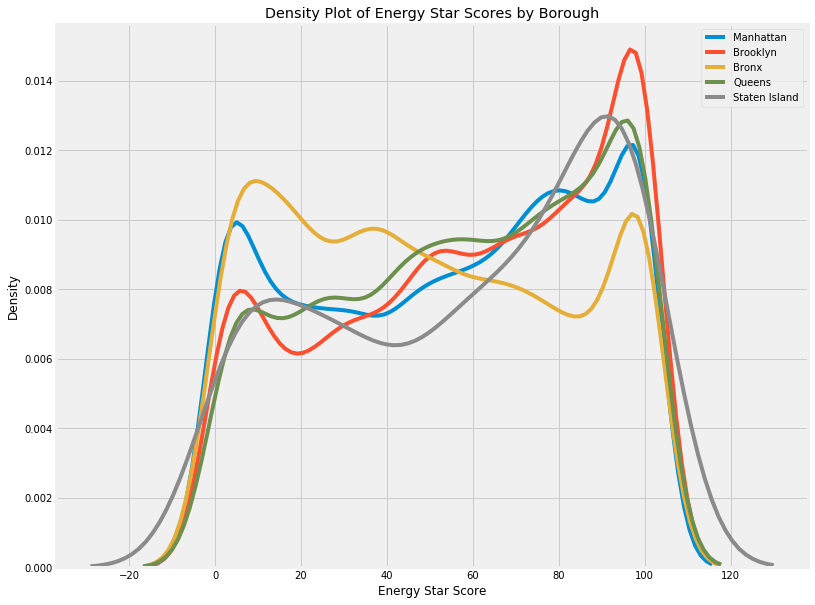

In [86]:
plt.figure(figsize = (12, 10))

for each_borough in borough:
    subset = data[data['Borough'] == each_borough]
    
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = each_borough)

plt.xlabel('Energy Star Score')
plt.ylabel('Density')
plt.title('Density Plot of Energy Star Scores by Borough')

In [87]:
correlation_data = data.corr()['ENERGY STAR Score'].sort_values()

In [88]:
correlation_data.head()

Site EUI (kBtu/ft²)                                          -0.764947
Weather Normalized Site EUI (kBtu/ft²)                       -0.759865
Weather Normalized Source EUI (kBtu/ft²)                     -0.676350
Source EUI (kBtu/ft²)                                        -0.664716
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.477838
Name: ENERGY STAR Score, dtype: float64

In [89]:
correlation_data.tail()

Water Use (All Water Sources) (kgal)                  0.000583
BBL - 10 digits                                       0.054764
Self-Reported Gross Floor Area (ft²)                  0.066285
Largest Property Use Type - Gross Floor Area (ft²)    0.068612
ENERGY STAR Score                                     1.000000
Name: ENERGY STAR Score, dtype: float64